In [1]:
import pandas as pd
df = pd.read_csv('data/311_Explorer.csv', low_memory = False)
df

,Reference Number,Date Created,Date Closed,Request Status,Status Detail,Service Category,Service Code,Business Unit,Neighbourhood,Community League,Ward,Address,Lat,Long,Location,Ticket Source,Calendar Year,Count,Posse_Number,Transit_Ref_Number
0,133345190,January 02 2013,January 03 2013,Closed,NaN,Dead Animal Removal,Dead Animal,Animal Control,ROPER INDUSTRIAL,NaN,11,"MCINTYRE ROAD NW, 75 STREET NW",53.494909,-113.442684,"(53.4949091725789, -113.442683685775)",Telephone call,2013,1,133345190-001,NaN
1,133350619,January 02 2013,January 03 2013,Closed,NaN,Dead Animal Removal,Dead Animal,Animal Control,LARKSPUR,The Meadows Community League Association,12,2004 - 38 AVENUE NW,53.477458,-113.372937,"(53.4774575415008, -113.372937215704)",Telephone call,2013,1,133350619-001,NaN
2,133358214,January 02 2013,January 03 2013,Closed,NaN,Dead Animal Removal,Dead Animal,Animal Control,GROVENOR,Grovenor Community League,6,"STONY PLAIN ROAD NW, 146 STREET NW",53.541951,-113.572553,"(53.5419506014602, -113.572553447766)",Telephone call,2013,1,133358214-001,NaN
3,133362915,January 02 2013,January 03 2013,Closed,NaN,Dead Animal Removal,Dead Animal,Animal Control,KENSINGTON,Kensington Community League,2,"124 STREET NW, 135 AVENUE NW",53.596425,-113.536605,"(53.5964246289633, -113.536605453992)",Telephone call,2013,1,133362915-001,NaN
4,133793810,January 04 2013,January 05 2013,Closed,NaN,Dead Animal Removal,Dead Animal,Animal Control,RAMPART INDUSTRIAL,Cumberland/Oxford Community League (COCL),2,"142 STREET NW, 145 AVENUE NW",53.607870,-113.569706,"(53.607869643367, -113.569705706795)",Telephone call,2013,1,133793810-001,NaN
5,133801539,January 04 2013,January 05 2013,Closed,NaN,Dead Animal Removal,Dead Animal,Animal Control,BONNIE DOON,The Cloverdale Community League,8,"97 STREET NW, 95 AVENUE NW",53.531987,-113.479247,"(53.5319872998896, -113.479246806762)",Telephone call,2013,1,133801539-001,NaN
6,8007107432,February 15 2013,February 22 2013,Closed,NaN,Pothole,Road,Roadway Operations,PARSONS INDUSTRIAL,NaN,WARD 11,"92 STREET NW, 26 AVENUE NW",53.455413,-113.470724,"(53.4554129808804, -113.47072368657)",Telephone call,2013,1,NaN,NaN
7,8007110682,February 16 2013,February 22 2013,Closed,NaN,Pothole,Road,Roadway Operations,SOUTHEAST INDUSTRIAL,NaN,WARD 11,"76 AVENUE NW, 17 STREET NW",53.512173,-113.369311,"(53.5121732324695, -113.369311381329)",Telephone call,2013,1,NaN,NaN
8,162275947,October 10 2014,October 11 2014,Closed,NaN,Dead Animal Removal,Dead Animal,Animal Control,BELVEDERE,Belvedere Community League,WARD 04,"65 STREET NW, FORT ROAD [SOUTHBOUND SIDE] NW",53.585944,-113.441238,"(53.5859441652213, -113.441238371358)",Telephone call,2014,1,162275947-001,NaN
9,8007119869,February 18 2013,February 21 2013,Closed,NaN,Pothole,Road,Roadway Operations,CORONET INDUSTRIAL,NaN,WARD 11,"97 STREET NW, 51 AVENUE NW",53.488148,-113.479380,"(53.4881478628254, -113.479380291521)",Telephone call,2013,1,NaN,NaN


In [5]:
list(df.columns)

['Reference Number',
 'Date Created',
 'Date Closed',
 'Request Status',
 'Status Detail',
 'Service Category',
 'Service Code',
 'Business Unit',
 'Neighbourhood',
 'Community League',
 'Ward',
 'Address',
 'Lat',
 'Long',
 'Location',
 'Ticket Source',
 'Calendar Year',
 'Count',
 'Posse_Number',
 'Transit_Ref_Number']

In [2]:
# Remove Posse_Number, Transit_Ref_Number, Count
# Posse_Number = Unique Identifier generated by POSSE
# Transit_Ref_Number = A ticket number from any Transit application
# Count = Number of service requests - usually 1. To be used for reporting purposes.
# Posse_Number, Transit_Ref_Number are for internal apps so they are redundant
# Count is all 1 so it is redundant.

# 'Reference Number' is kept in case a certain row needs to be looked up

df['Count'].value_counts()

1    294097
Name: Count, dtype: int64

In [3]:
del df['Posse_Number']
del df['Transit_Ref_Number']
del df['Count']

df.columns

Index(['Reference Number', 'Date Created', 'Date Closed', 'Request Status',
       'Status Detail', 'Service Category', 'Service Code', 'Business Unit',
       'Neighbourhood', 'Community League', 'Ward', 'Address', 'Lat', 'Long',
       'Location', 'Ticket Source', 'Calendar Year'],
      dtype='object')

In [4]:
# Next we look at the different values for each column

df['Request Status'].value_counts()

Closed    292902
Open        1195
Name: Request Status, dtype: int64

In [5]:
df['Status Detail'].value_counts()

Duplicate Request Exists                          7274
Vehicle Gone Upon Arrival                         5912
Citizen Complied                                  5206
Assessed-No Action Required                       3918
Deferred-Future Work Planned.                     3613
Enforcement Action Taken                          2861
Does Not Meet Bylaw Offence Standards             2283
Citizen Contacted                                 2142
311 Redirecting to Other Business Area            1225
Duplicate Request                                  929
Work to be completed as per online schedule        830
Non-City Service or Location                       645
Redirected to Other Government Agency              610
Vehicle Towed                                      571
Redirected to External Organization                563
Warning Issued, No Further Action at this Time     514
Location Not Found                                 284
Partially Completed-Future work planned            232
Lost Item 

In [6]:
# merge duplicate 'Duplicate Request Exists' with 'Duplicate Request' 
df.loc[df['Status Detail'] == 'Duplicate Request', 'Status Detail'] = 'Duplicate Request Exists'
df['Status Detail'].value_counts()

Duplicate Request Exists                          8203
Vehicle Gone Upon Arrival                         5912
Citizen Complied                                  5206
Assessed-No Action Required                       3918
Deferred-Future Work Planned.                     3613
Enforcement Action Taken                          2861
Does Not Meet Bylaw Offence Standards             2283
Citizen Contacted                                 2142
311 Redirecting to Other Business Area            1225
Work to be completed as per online schedule        830
Non-City Service or Location                       645
Redirected to Other Government Agency              610
Vehicle Towed                                      571
Redirected to External Organization                563
Warning Issued, No Further Action at this Time     514
Location Not Found                                 284
Partially Completed-Future work planned            232
Lost Item Not found                                170
Unable to 

In [7]:
df['Service Category'].value_counts()

Pothole                            58621
Snow & Ice Maintenance             49206
Drainage Maintenance               32952
Traffic Lights & Signs             27577
Road/Sidewalk Maintenance          26075
Litter & Waste                     23951
Tree Maintenance                   23377
Parking Enforcement                19413
Parks & Sportsfield Maintenance    12869
Dead Animal Removal                10504
Vandalism/Graffiti                  6730
Pest Management                     1693
Structure Maintenance               1129
Name: Service Category, dtype: int64

In [8]:
df['Service Code'].value_counts()

Road                                              56582
Manhole Cover Concern                             19052
Road Snow Removal                                 18992
Pothole                                           15039
Dead Animal                                       10504
Sanding                                           10348
Safety & Other                                     9240
Sign Request                                       7654
Road Dip                                           7197
Abandoned Vehicle                                  6727
Tree Pruning Request                               6204
Broken Branches                                    6108
Hazardous Branch                                   5954
Road Blocked By Snow                               5726
Overgrown Grass                                    5570
Sidewalk Displacement                              5284
Damaged Non-Emergency Signs (i.e. Speed Limit)     4152
Signal Timing (Green Light)                     

In [9]:
df['Business Unit'].value_counts()

Roadway Operations                             157459
Drainage Operations                             29376
Traffic Engineering                             27386
Forestry                                        23207
Parks                                           20436
Community Standards                             20314
Animal Control                                  10504
River Valley Operations                          2931
Pest                                             1693
Transit                                           499
Waste                                             180
Rangers/River Valley Trails                        99
Capitial City Clean Up - Community Services        13
Name: Business Unit, dtype: int64

In [10]:
df['Neighbourhood'].value_counts()

DOWNTOWN                                                                                                 6175
OLIVER                                                                                                   4397
STRATHCONA                                                                                               4378
ALBERTA AVENUE                                                                                           3577
WESTMOUNT                                                                                                3091
GARNEAU                                                                                                  2861
BONNIE DOON                                                                                              2634
FOREST HEIGHTS                                                                                           2569
MCCAULEY                                                                                                 2488
QUEEN ALEX

In [11]:
# there appear to be typos and multiple neighborhoods put into one entry
# values will be standardized to city's list of neighborhoods

print(len(df['Neighbourhood'].value_counts()))

# There should only be 394 neighborhoods according to City Data
# https://data.edmonton.ca/City-Administration/City-of-Edmonton-Neighbourhoods/65fr-66s6

# We find the data inconsistent with city data using sets

neighborhoods = pd.read_csv('data/City_of_Edmonton_-_Neighbourhoods.csv')
a = set(df['Neighbourhood'].tolist())
b = set([x.upper() for x in neighborhoods['Neighbourhood Name'].astype(str).tolist()])

unknown_neighborhoods = list(a-b)
print(len(unknown_neighborhoods))

# There are 22 unknown neighborhoods
# 3 different groups: multiple neighbourhoods, single neighbourhoods, no label neighbourhoods
# get the multiple neighbourhoods, single neighbourhoods
# multiple neigborhoods does not need further conversion since they line up with city data
unknown_multi = []
for x in unknown_neighborhoods:
    if str(x).find(",") != -1:
        unknown_multi.append(x)
unknown_single = list(set(unknown_neighborhoods) - set(unknown_multi))
unknown_single.pop(0)
print(unknown_single)

# split the multiple neighborhoods into multiple duplicate rows
new_rows = []
indices_todelete = []
nmap = {}

414
22
['ANTHONY HENDAY SOUTHEAST', 'CPR WEST', 'HERITAGE VALLEY AREA EAST', 'MEADOWS AREA', 'RURAL WEST', 'EDMONTON MUNICIPAL AIRPORT', 'CRYSTALLINA NERA', 'RURAL NORTH EAST NORTH STURGEON']


In [12]:
for x in unknown_multi:
    a = df.loc[df['Neighbourhood'] == x]
    l = x.split(", ")
    for index,row in a.iterrows():
        indices_todelete.append(index)
        for y in l:
            newrow = row
            newrow['Neighbourhood'] = y
            new_rows.append(newrow.values)

# reallocate the single neighborhoods to the appropriate neighborhood using city's neighborhood data
# code from: http://www.mhermans.net/geojson-shapely-geocoding.html
import json
from shapely.geometry import shape, Point

# load GeoJSON file containing sectors
with open('data/neighbourhoods.geojson') as f:
    js = json.load(f)

for x in unknown_single:
    a = df.loc[df['Neighbourhood'] == x]
    for index,row in a.iterrows():
        indices_todelete.append(index)
        # construct point based on lon/lat returned by geocoder
        point = Point(row['Long'], row['Lat'])

        name = "LOL_blank"
        # check each polygon to see if it contains the point
        for feature in js['features']:
            polygon = shape(feature['geometry'])
            if polygon.contains(point):
                name = feature['properties']['name'].upper()
                nmap[x] = feature['properties']['name'].upper()
                print(name)
                break
                
        newrow = row
        newrow['Neighbourhood'] = name
        new_rows.append(newrow.values)

ANTHONY HENDAY SOUTH EAST
ANTHONY HENDAY SOUTH EAST
ANTHONY HENDAY SOUTH EAST
ANTHONY HENDAY SOUTH EAST
ANTHONY HENDAY SOUTH EAST
ANTHONY HENDAY SOUTH EAST
ANTHONY HENDAY SOUTH EAST
ANTHONY HENDAY SOUTH EAST
ANTHONY HENDAY SOUTH EAST
ANTHONY HENDAY SOUTH EAST
ANTHONY HENDAY SOUTH EAST
ANTHONY HENDAY SOUTH EAST
ANTHONY HENDAY SOUTH EAST
ANTHONY HENDAY SOUTH EAST
ANTHONY HENDAY SOUTH EAST
ANTHONY HENDAY SOUTH EAST
ANTHONY HENDAY SOUTH EAST
ANTHONY HENDAY SOUTH EAST
ANTHONY HENDAY SOUTH EAST
ANTHONY HENDAY SOUTH EAST
ANTHONY HENDAY SOUTH EAST
ANTHONY HENDAY SOUTH EAST
ANTHONY HENDAY SOUTH EAST
ANTHONY HENDAY SOUTH EAST
ANTHONY HENDAY SOUTH EAST
ANTHONY HENDAY SOUTH EAST
ANTHONY HENDAY SOUTH EAST
ANTHONY HENDAY SOUTH EAST
ANTHONY HENDAY SOUTH EAST
ANTHONY HENDAY SOUTH EAST
ANTHONY HENDAY SOUTH EAST
ANTHONY HENDAY SOUTH EAST
ANTHONY HENDAY SOUTH EAST
ANTHONY HENDAY SOUTH EAST
ANTHONY HENDAY SOUTH EAST
ANTHONY HENDAY SOUTH EAST
ANTHONY HENDAY SOUTH EAST
ANTHONY HENDAY SOUTH EAST
ANTHONY HEND

In [13]:
print(nmap)

{'EDMONTON MUNICIPAL AIRPORT': 'BLATCHFORD AREA', 'ANTHONY HENDAY SOUTHEAST': 'ANTHONY HENDAY SOUTH EAST', 'CPR WEST': 'STRATHCONA JUNCTION', 'RURAL NORTH EAST NORTH STURGEON': 'EDMONTON ENERGY AND TECHNOLOGY PARK', 'CRYSTALLINA NERA': 'CRYSTALLINA NERA WEST', 'RURAL WEST': "RIVER'S EDGE", 'MEADOWS AREA': 'ASTER', 'HERITAGE VALLEY AREA EAST': 'CAVANAGH'}


In [14]:
# find the appropriate neighborhood for the unknown neighborhood
# however unknown neighborhoods may be out of bounds and therefore not a neighborhood
a = df.loc[df['Neighbourhood'].isnull()]
for index,row in a.iterrows():
    # construct point based on lon/lat returned by geocoder
    point = Point(row['Long'], row['Lat'])

    name = "LOL_blank"
    changed = False
    # check each polygon to see if it contains the point
    for feature in js['features']:
        polygon = shape(feature['geometry'])
        if polygon.contains(point):
            name = feature['properties']['name'].upper()
            print(name)
            changed = True
            break
            
    if changed:
        newrow = row
        newrow['Neighbourhood'] = name
        new_rows.append(newrow.values) 
        indices_todelete.append(index)

        

In [15]:
indexes_to_keep = set(range(df.shape[0])) - set(indices_todelete)
df = df.take(list(indexes_to_keep))
df = df.append(pd.DataFrame(new_rows, columns=df.columns))

a = set(df['Neighbourhood'].tolist())
b = set([x.upper() for x in neighborhoods['Neighbourhood Name'].astype(str).tolist()])

unknown_neighborhoods = list(a-b)
print(unknown_neighborhoods)

[nan]


In [16]:
df['Community League'].value_counts()
# note that some locations may not have community leagues df.loc[df['Community League'].isnull()]

Oliver Community League                            5466
Strathcona Centre Community League                 5427
The Rossdale Community League (1974)               4777
Heritage Point Community League                    4505
McLeod Community League                            4034
Cumberland/Oxford Community League (COCL)          4032
Horse Hill Community League (1995) Asssociation    3744
Forest/Terrace Heights Community League            3720
Summerside Community League of Edmonton            3562
Terwillegar Community League                       3400
Kilkenny Community League                          3364
Alberta Avenue Community League                    3311
The Baturyn Community League                       3303
Evansdale Community League                         3282
The Meadows Community League Association           3242
The Woodvale Community League                      3201
Greater Windermere Community League                3177
Riverbend Community League                      

In [17]:
df['Ward'].value_counts(dropna=False)

NaN        106148
WARD 08     20297
WARD 11     17477
WARD 07     17078
WARD 02     16881
WARD 06     16357
WARD 01     14805
WARD 10     12793
WARD 09     11533
WARD 05     10689
WARD 04     10301
WARD 03      9744
WARD 12      9166
7            2491
8            2411
2            2151
6            2068
11           2014
1            1798
10           1692
4            1527
9            1338
12           1265
5            1108
3             995
Name: Ward, dtype: int64

In [ ]:
# ward boundaries changed recently need to make them consistent with lat/long
# code from: http://www.mhermans.net/geojson-shapely-geocoding.html
import json
from shapely.geometry import shape, Point

# load GeoJSON file containing sectors
with open('data/ward_boundaries.geojson') as f:
    js = json.load(f)

for index,row in df.iterrows():
    # construct point based on lon/lat returned by geocoder
    point = Point(row['Long'], row['Lat'])
    
    name = "LOL_blank"
    # check each polygon to see if it contains the point
    for feature in js['features']:
        polygon = shape(feature['geometry'])
        print(polygon)
        if polygon.contains(point):
            name = feature['properties']['name'].upper()
            if row['Ward'] != name:
                df.set_value(index, 'Ward',name)
            break


MULTIPOLYGON (((-113.6747367523594 53.59756357281091, -113.674561834323 53.59763324110704, -113.6744943159531 53.59765981938894, -113.6744266279531 53.59768622506738, -113.674355573083 53.59771369177232, -113.6742853859654 53.59774057128389, -113.6742096694707 53.59776929016713, -113.6741324955758 53.59779827467999, -113.6741194999775 53.5978032967926, -113.6740991077856 53.59781163467935, -113.6740789762784 53.59782044702211, -113.6740603403843 53.59782916688031, -113.6740477354946 53.59783578510886, -113.6740391266337 53.59784085666364, -113.6740309374262 53.59784616845565, -113.674023186795 53.59785170821073, -113.6740158926497 53.59785746312821, -113.6740076073297 53.59786478349806, -113.6739823993435 53.59788922329351, -113.6739581586874 53.59791184249388, -113.6739349803026 53.5979326662345, -113.6739112208016 53.5979532569242, -113.6738882536503 53.59797248452536, -113.6738643144707 53.59799186488629, -113.673790729214 53.59804915744706, -113.673721738412 53.59810238160126, -113

In [41]:
s = df.loc[df['Ward'].isnull()]

with open('data/ward_boundaries.geojson') as f:
    js = json.load(f)

for index,row in s.iterrows():
    # construct point based on lon/lat returned by geocoder
    point = Point(row['Long'], row['Lat'])
    
    name = "LOL_blank"
    # check each polygon to see if it contains the point
    for feature in js['features']:
        polygon = shape(feature['geometry'])
        if polygon.contains(point):
            name = feature['properties']['name'].upper()
            print(name)
            break

In [19]:
# Inconsistent values so we change them all to numbers
df.loc[df.Ward == 'WARD 01', 'Ward'] = '1'
df.loc[df.Ward == 'WARD 02', 'Ward'] = '2'
df.loc[df.Ward == 'WARD 03', 'Ward'] = '3'
df.loc[df.Ward == 'WARD 04', 'Ward'] = '4'
df.loc[df.Ward == 'WARD 05', 'Ward'] = '5'
df.loc[df.Ward == 'WARD 06', 'Ward'] = '6'
df.loc[df.Ward == 'WARD 07', 'Ward'] = '7'
df.loc[df.Ward == 'WARD 08', 'Ward'] = '8'
df.loc[df.Ward == 'WARD 09', 'Ward'] = '9'
df.loc[df.Ward == 'WARD 10', 'Ward'] = '10'
df.loc[df.Ward == 'WARD 11', 'Ward'] = '11'
df.loc[df.Ward == 'WARD 12', 'Ward'] = '12'

df['Ward'].value_counts(dropna=False)

8      35180
6      30158
7      30111
2      29659
11     28018
1      24912
9      22607
10     22080
4      18751
5      18179
12     17854
3      16063
NaN      555
Name: Ward, dtype: int64

In [20]:
df['Address'].value_counts()

FORTWAY DRIVE NW, RIVER VALLEY ROAD NW                            336
ELLERSLIE ROAD SW, 141 STREET SW                                  291
WHITEMUD DRIVE NW, 111 STREET NW                                  272
ELLERSLIE ROAD SW, 127 STREET SW                                  259
90 AVENUE NW, 75 STREET NW                                        217
WHITEMUD DRIVE NW, 122 STREET NW                                  212
153 AVENUE NW, 127 STREET NW                                      210
WHITEMUD DRIVE NW, TERWILLEGAR DRIVE NW                           209
WHITEMUD DRIVE NW, 50 STREET NW                                   197
FORT EDMONTON PARK ROAD NW, FOX DRIVE NW                          192
63 AVENUE NW, 99 STREET NW                                        186
127 STREET NW, YELLOWHEAD TRAIL NW                                183
23 AVENUE NW, 111 STREET NW                                       180
WHITEMUD DRIVE NW, 149 STREET NW                                  177
ELLERSLIE ROAD SW, 1

In [21]:
df['Location'].value_counts()

(53.4856197869093, -113.442657338181)    342
(53.4833475151476, -113.517548908549)    264
(53.4999279228561, -113.48612689179)     245
(53.5319704630012, -113.513217598302)    242
(53.5252261941918, -113.442903177356)    238
(53.4877699712196, -113.418165348183)    237
(53.5140942387225, -113.578590888583)    237
(53.6169606896143, -113.541223157185)    237
(53.5412168098304, -113.443425113209)    228
(53.5806804747661, -113.541196222596)    227
(53.4885215295921, -113.571713525772)    219
(53.4249037821468, -113.540946366527)    204
(53.5819570831823, -113.418306462166)    197
(53.4835534233274, -113.466899087183)    191
(53.5739066069785, -113.615311080041)    190
(53.6140394628019, -113.491845015324)    187
(53.4540046841659, -113.516161034469)    184
(53.537533144164, -113.443002489362)     182
(53.512207224066, -113.688849919873)     178
(53.6141843642029, -113.516704886971)    178
(53.5629922465226, -113.445769928279)    176
(53.480770091302, -113.486099016699)     176
(53.424910

In [22]:
df['Ticket Source'].value_counts()

Telephone call      228277
Mobile App Auto      14324
MobileApp            13703
Internet Mail        12197
Web Form             10451
Posse Auto            8514
Mobile App Agent      6661
Name: Ticket Source, dtype: int64

In [23]:
df.loc[df['Ticket Source']=='Mobile App Auto','Ticket Source'] = 'MobileApp'
df.loc[df['Ticket Source']=='Mobile App Agent','Ticket Source'] = 'MobileApp'
df['Ticket Source'].value_counts()

Telephone call    228277
MobileApp          34688
Internet Mail      12197
Web Form           10451
Posse Auto          8514
Name: Ticket Source, dtype: int64

In [24]:
df['Calendar Year'].value_counts()

2017    73126
2013    63531
2014    61053
2015    53276
2016    43141
Name: Calendar Year, dtype: int64

In [25]:
# convert date columns to datetime format
df['Date Created'] = pd.to_datetime(df['Date Created'])
df['Date Closed'] = pd.to_datetime(df['Date Closed'])

In [26]:
# remove entries created after October 31, 2017
from datetime import date

pd.options.mode.chained_assignment = None  # default='warn'

df = df[df['Date Created'] < date(2017,11, 1)]

In [27]:
# create column for "Days to Resolution"
df['Days to Resolution'] = df['Date Closed'] - df['Date Created']
df['Days to Resolution'] = df['Days to Resolution'].dt.days

df['Days to Resolution'].value_counts()

0.0      49884
1.0      47698
2.0      22754
3.0      20163
4.0      14507
5.0      10717
6.0       8845
7.0       8150
8.0       5641
9.0       4614
10.0      3656
11.0      3487
14.0      3261
13.0      3250
12.0      3209
15.0      2743
16.0      2143
21.0      2128
20.0      2017
17.0      1956
18.0      1825
19.0      1807
22.0      1790
28.0      1633
23.0      1567
27.0      1509
29.0      1368
26.0      1356
24.0      1322
25.0      1309
         ...  
915.0        1
916.0        1
917.0        1
920.0        1
923.0        1
926.0        1
927.0        1
890.0        1
888.0        1
829.0        1
856.0        1
830.0        1
832.0        1
834.0        1
836.0        1
839.0        1
843.0        1
851.0        1
855.0        1
859.0        1
885.0        1
864.0        1
866.0        1
870.0        1
871.0        1
875.0        1
876.0        1
879.0        1
882.0        1
487.0        1
Name: Days to Resolution, dtype: int64

In [28]:
# Insert column for Month Ticket was Created, Month Ticket was Closed
df['Month Created'] = df['Date Created'].dt.month
df['Month Closed'] = df['Date Closed'].dt.month

# Insert column for Calendar Year ticket was Closed
#df['Calendar Year Closed'] = df['Date Closed'].dt.year

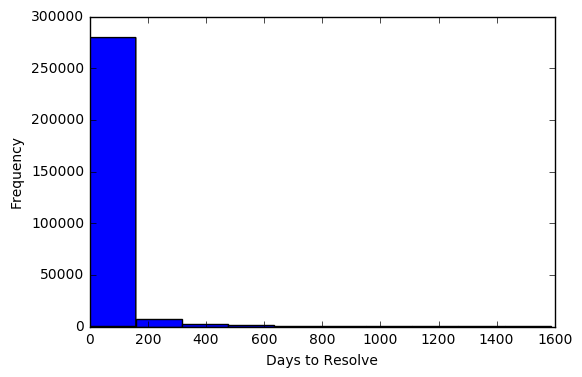

In [29]:
import matplotlib.pyplot as plt 

df['Days to Resolution'].plot.hist()
plt.xlabel("Days to Resolve")
plt.show()

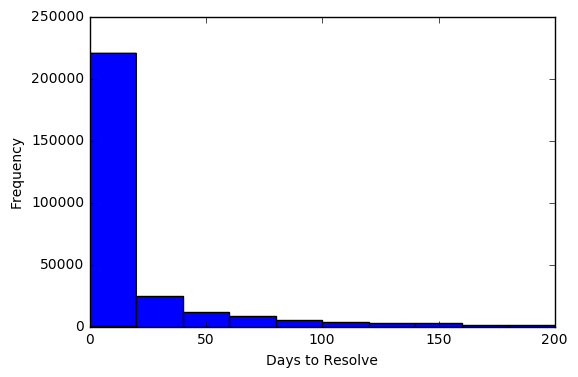

In [30]:
df.loc[df['Days to Resolution'] <= 200, 'Days to Resolution'].plot.hist()
plt.xlabel("Days to Resolve")
plt.show()

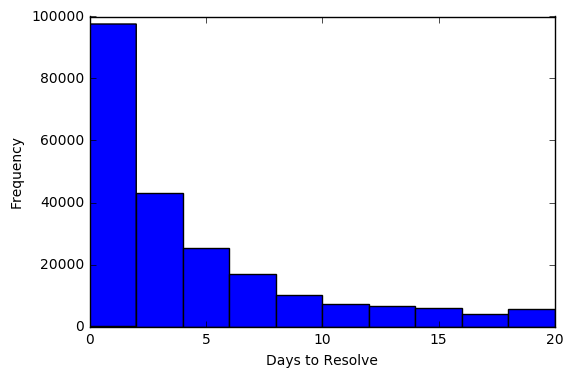

In [31]:
df.loc[df['Days to Resolution'] <= 20, 'Days to Resolution'].plot.hist()
plt.xlabel("Days to Resolve")
plt.show()

In [32]:
import numpy as np
df['Days to Resolution'] = pd.cut(df['Days to Resolution'], \
        bins = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 40, 60, 80, np.inf], include_lowest = True)
df['Days to Resolution'].value_counts()

[0, 2]       120336
(2, 4]        34670
(80, inf]     25145
(20, 40]      23347
(4, 6]        19562
(6, 8]        13791
(40, 60]      11925
(8, 10]        8270
(60, 80]       8107
(10, 12]       6696
(12, 14]       6511
(14, 16]       4886
(18, 20]       3824
(16, 18]       3781
Name: Days to Resolution, dtype: int64

In [33]:
df.to_csv('data/311_Explorer_01.csv', index=False)

In [34]:
df

,Reference Number,Date Created,Date Closed,Request Status,Status Detail,Service Category,Service Code,Business Unit,Neighbourhood,Community League,Ward,Address,Lat,Long,Location,Ticket Source,Calendar Year,Days to Resolution,Month Created,Month Closed
0,133345190,2013-01-02,2013-01-03,Closed,NaN,Dead Animal Removal,Dead Animal,Animal Control,ROPER INDUSTRIAL,NaN,9,"MCINTYRE ROAD NW, 75 STREET NW",53.494909,-113.442684,"(53.4949091725789, -113.442683685775)",Telephone call,2013,"[0, 2]",1,1.0
1,133350619,2013-01-02,2013-01-03,Closed,NaN,Dead Animal Removal,Dead Animal,Animal Control,LARKSPUR,The Meadows Community League Association,9,2004 - 38 AVENUE NW,53.477458,-113.372937,"(53.4774575415008, -113.372937215704)",Telephone call,2013,"[0, 2]",1,1.0
2,133358214,2013-01-02,2013-01-03,Closed,NaN,Dead Animal Removal,Dead Animal,Animal Control,GROVENOR,Grovenor Community League,9,"STONY PLAIN ROAD NW, 146 STREET NW",53.541951,-113.572553,"(53.5419506014602, -113.572553447766)",Telephone call,2013,"[0, 2]",1,1.0
3,133362915,2013-01-02,2013-01-03,Closed,NaN,Dead Animal Removal,Dead Animal,Animal Control,KENSINGTON,Kensington Community League,9,"124 STREET NW, 135 AVENUE NW",53.596425,-113.536605,"(53.5964246289633, -113.536605453992)",Telephone call,2013,"[0, 2]",1,1.0
4,133793810,2013-01-04,2013-01-05,Closed,NaN,Dead Animal Removal,Dead Animal,Animal Control,RAMPART INDUSTRIAL,Cumberland/Oxford Community League (COCL),9,"142 STREET NW, 145 AVENUE NW",53.607870,-113.569706,"(53.607869643367, -113.569705706795)",Telephone call,2013,"[0, 2]",1,1.0
5,133801539,2013-01-04,2013-01-05,Closed,NaN,Dead Animal Removal,Dead Animal,Animal Control,BONNIE DOON,The Cloverdale Community League,9,"97 STREET NW, 95 AVENUE NW",53.531987,-113.479247,"(53.5319872998896, -113.479246806762)",Telephone call,2013,"[0, 2]",1,1.0
6,8007107432,2013-02-15,2013-02-22,Closed,NaN,Pothole,Road,Roadway Operations,PARSONS INDUSTRIAL,NaN,11,"92 STREET NW, 26 AVENUE NW",53.455413,-113.470724,"(53.4554129808804, -113.47072368657)",Telephone call,2013,"(6, 8]",2,2.0
7,8007110682,2013-02-16,2013-02-22,Closed,NaN,Pothole,Road,Roadway Operations,SOUTHEAST INDUSTRIAL,NaN,11,"76 AVENUE NW, 17 STREET NW",53.512173,-113.369311,"(53.5121732324695, -113.369311381329)",Telephone call,2013,"(4, 6]",2,2.0
8,162275947,2014-10-10,2014-10-11,Closed,NaN,Dead Animal Removal,Dead Animal,Animal Control,BELVEDERE,Belvedere Community League,8,"65 STREET NW, FORT ROAD [SOUTHBOUND SIDE] NW",53.585944,-113.441238,"(53.5859441652213, -113.441238371358)",Telephone call,2014,"[0, 2]",10,10.0
9,8007119869,2013-02-18,2013-02-21,Closed,NaN,Pothole,Road,Roadway Operations,CORONET INDUSTRIAL,NaN,8,"97 STREET NW, 51 AVENUE NW",53.488148,-113.479380,"(53.4881478628254, -113.479380291521)",Telephone call,2013,"(2, 4]",2,2.0
